'''
[소주제 3 + 2] \
<시간대별 버스 이용량 분석>
- 기준월 및 기준일자별 버스 이용량분석 비교
- 기준일 및 시간대별 버스 이용량 분석 비교
- 기준시간 및 시간(분)별 버스 이용량 분석 비교

<버스 내 체류시간 분석>
- 기준일 및 시간대별 버스내 체류시간(분) 분석비교
- 시간 및 승객구분별 빈도분석 비교

<승하차 정류장별 버스내 체류시간 분석>
- 승하차 정류장별 체류시간(분) 상위 30건 분석 비교

<소주제 2개 이상 추가 도출>
- 포항시 관련 추가 데이터 수집하여 분석 가능

** 아래와 같이 진행 **
- 모든 폴더의 데이터 하나의 csv 파일로 합치기
- 모든 데이터 합치고 -> 전처리(결측/이상/중복) 진행하기
- 통합 파일로 저장 후에 위에 소주제 분석
- 조별로 위 분석 주제들 논의하시고
- 오류는 팀내에서 스터디 후 해결

** 분석된 파일 제출 **
- 제출 위치 : 구글드라이브 > 03_산출물 > 2_포항버스교통데이터분석_제출
- 파일명 : 수집데이터 폴더 + 가공데이터 폴더 + ipynb파일 ==> 본인이름.zip
'''

## 데이터 불러오기 및 한글컬럼명 바꾸기

In [55]:
import pandas as pd

In [56]:
df_total = pd.DataFrame()
for i in range(1, 81, 1):
    file_path = './포항/trfcard({})/trfcard.csv'.format(i)
    df = pd.read_csv(file_path, encoding='utf-8')
    df_total = pd.concat([df_total, df])

In [57]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842608 entries, 0 to 4982
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   on_date      842608 non-null  int64  
 1   off_date     842608 non-null  int64  
 2   route_name   842608 non-null  object 
 3   descr        842608 non-null  object 
 4   age_type     842608 non-null  object 
 5   trans_yn     842608 non-null  object 
 6   addfee_yn    842608 non-null  object 
 7   start_bstop  842608 non-null  object 
 8   start_gps_x  842608 non-null  float64
 9   start_gps_y  842608 non-null  float64
 10  end_bstop    842608 non-null  object 
 11  end_gps_x    842608 non-null  float64
 12  end_gps_y    842608 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 90.0+ MB


In [58]:
col_name = pd.read_excel('./포항/컬럼명.xlsx', header=11)
col_name

,컬럼명(한글),컬럼명(영문),컬럼 설명,데이터 타입,코드값 여부,코드 테이블,비고
0,승차시각,on_date,승차시각,datetime,N,NaN,NaN
1,하차시각,off_date,하차시각,datetime,N,NaN,NaN
2,노선명,route_name,노선명,varchar,N,NaN,NaN
3,노선설명,descr,노선설명,varchar,N,NaN,NaN
4,승객연령,age_type,승객연령,varchar,N,NaN,NaN
5,환승여부,trans_yn,환승여부,varchar,N,NaN,NaN
6,추가운임여부,addfee_yn,추가운임여부,varchar,N,NaN,NaN
7,승차정류장,start_bstop,승차정류장,varchar,N,NaN,NaN
8,승차정류장 GPS X,start_gps_x,승차정류장 GPS X,numeric,N,NaN,NaN
9,승차정류장 GPS Y,start_gps_y,승차정류장 GPS Y,numeric,N,NaN,NaN


In [59]:
kor_col = []
for j in range (len(col_name)):
    kor_col.append(col_name['컬럼명(한글)'][j])
print(kor_col)

['승차시각', '하차시각', '노선명', '노선설명', '승객연령', '환승여부', '추가운임여부', '승차정류장', '승차정류장 GPS X', '승차정류장 GPS Y', '하차정류장', '하차정류장 GPS X', '하차정류장 GPS Y']


In [60]:
df_total.columns = kor_col
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842608 entries, 0 to 4982
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   승차시각         842608 non-null  int64  
 1   하차시각         842608 non-null  int64  
 2   노선명          842608 non-null  object 
 3   노선설명         842608 non-null  object 
 4   승객연령         842608 non-null  object 
 5   환승여부         842608 non-null  object 
 6   추가운임여부       842608 non-null  object 
 7   승차정류장        842608 non-null  object 
 8   승차정류장 GPS X  842608 non-null  float64
 9   승차정류장 GPS Y  842608 non-null  float64
 10  하차정류장        842608 non-null  object 
 11  하차정류장 GPS X  842608 non-null  float64
 12  하차정류장 GPS Y  842608 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 90.0+ MB


In [61]:
df_total

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,20200327232513,20200327232800,101,양덕-고속터미널-동해,일반,Y,N,포은중앙도서관,129.367873,36.043187,롯데아파트,129.377403,36.056943
4979,20200327232740,20200327233319,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,우현경로당,129.362232,36.049878
4980,20200327232829,20200327233446,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,시외버스터미널,129.350290,36.013280,연일파출소,129.345750,35.997470
4981,20200327233328,20200327233442,107,문덕-시외(고속)터미널-흥해,일반,N,N,우현경로당,129.362232,36.049878,도심환승센터,129.365165,36.043435


In [62]:
df_total['승차시각'] = df_total['승차시각'].astype(str)
df_total['하차시각'] = df_total['하차시각'].astype(str)

In [63]:
df_total['년(승차)'] = df_total['승차시각'].str[:4]
df_total['월(승차)'] = df_total['승차시각'].str[4:6]
df_total['일(승차)'] = df_total['승차시각'].str[6:8]
df_total['시(승차)'] = df_total['승차시각'].str[8:10]
df_total['분(승차)'] = df_total['승차시각'].str[10:12]
df_total['초(승차)'] = df_total['승차시각'].str[12:]

df_total['년(하차)'] = df_total['하차시각'].str[:4]
df_total['월(하차)'] = df_total['하차시각'].str[4:6]
df_total['일(하차)'] = df_total['하차시각'].str[6:8]
df_total['시(하차)'] = df_total['하차시각'].str[8:10]
df_total['분(하차)'] = df_total['하차시각'].str[10:12]
df_total['초(하차)'] = df_total['하차시각'].str[12:]

In [64]:
df_total

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,...,일(승차),시(승차),분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차)
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,...,02,05,10,49,2020,01,02,05,18,44
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,...,02,05,13,38,2020,01,02,05,45,49
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,...,02,05,15,49,2020,01,02,05,19,30
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,...,02,05,16,17,2020,01,02,05,50,46
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,...,02,05,18,41,2020,01,02,05,23,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,20200327232513,20200327232800,101,양덕-고속터미널-동해,일반,Y,N,포은중앙도서관,129.367873,36.043187,...,27,23,25,13,2020,03,27,23,28,00
4979,20200327232740,20200327233319,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,...,27,23,27,40,2020,03,27,23,33,19
4980,20200327232829,20200327233446,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,시외버스터미널,129.350290,36.013280,...,27,23,28,29,2020,03,27,23,34,46
4981,20200327233328,20200327233442,107,문덕-시외(고속)터미널-흥해,일반,N,N,우현경로당,129.362232,36.049878,...,27,23,33,28,2020,03,27,23,34,42


In [65]:
df_total['승차시각'] = df_total['승차시각'].astype(str)
df_total['하차시각'] = df_total['하차시각'].astype(str)

In [66]:
df_total['소요시간'] = pd.to_datetime(df_total['하차시각']) - pd.to_datetime(df_total['승차시각'])
df_total.head()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,...,시(승차),분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차),소요시간
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,...,05,10,49,2020,01,02,05,18,44,0 days 00:07:55
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,...,05,13,38,2020,01,02,05,45,49,0 days 00:32:11
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,...,05,15,49,2020,01,02,05,19,30,0 days 00:03:41
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,...,05,16,17,2020,01,02,05,50,46,0 days 00:34:29
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,...,05,18,41,2020,01,02,05,23,10,0 days 00:04:29


## 결측치, 이상치, 중복데이터 확인

In [67]:
df_total.isnull().sum()

승차시각           0
하차시각           0
노선명            0
노선설명           0
승객연령           0
환승여부           0
추가운임여부         0
승차정류장          0
승차정류장 GPS X    0
승차정류장 GPS Y    0
하차정류장          0
하차정류장 GPS X    0
하차정류장 GPS Y    0
년(승차)          0
월(승차)          0
일(승차)          0
시(승차)          0
분(승차)          0
초(승차)          0
년(하차)          0
월(하차)          0
일(하차)          0
시(하차)          0
분(하차)          0
초(하차)          0
소요시간           0
dtype: int64

## 기준월 및 기준일자별 버스 이용량분석 비교

In [68]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842608 entries, 0 to 4982
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   승차시각         842608 non-null  object         
 1   하차시각         842608 non-null  object         
 2   노선명          842608 non-null  object         
 3   노선설명         842608 non-null  object         
 4   승객연령         842608 non-null  object         
 5   환승여부         842608 non-null  object         
 6   추가운임여부       842608 non-null  object         
 7   승차정류장        842608 non-null  object         
 8   승차정류장 GPS X  842608 non-null  float64        
 9   승차정류장 GPS Y  842608 non-null  float64        
 10  하차정류장        842608 non-null  object         
 11  하차정류장 GPS X  842608 non-null  float64        
 12  하차정류장 GPS Y  842608 non-null  float64        
 13  년(승차)        842608 non-null  object         
 14  월(승차)        842608 non-null  object         
 15  일(승차)        842608

In [69]:
df_total[['승차시각','월(승차)','일(승차)']]

,승차시각,월(승차),일(승차)
0,20200102051049,01,02
1,20200102051338,01,02
2,20200102051549,01,02
3,20200102051617,01,02
4,20200102051841,01,02
...,...,...,...
4978,20200327232513,03,27
4979,20200327232740,03,27
4980,20200327232829,03,27
4981,20200327233328,03,27


In [70]:
df_total_p1 = df_total.pivot_table(values='승차시각',
                            index='월(승차)',
                            columns='일(승차)',
                            aggfunc='count')
df_total_p1

일(승차),01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
월(승차),,,,,,,,,,,,,,,,,,,,,
01,9369.0,16185.0,16614.0,12556.0,9527.0,15494.0,12988.0,15808.0,16788.0,17524.0,...,17247.0,17415.0,9125.0,5927.0,7781.0,5472.0,14486.0,16046.0,15892.0,16202.0
02,11810.0,8547.0,15842.0,15507.0,14919.0,14382.0,15715.0,11371.0,8327.0,15597.0,...,5657.0,2900.0,5938.0,4477.0,5347.0,5422.0,5491.0,3758.0,NaN,NaN
03,2402.0,6545.0,5697.0,5978.0,5830.0,6152.0,4114.0,2827.0,6881.0,5345.0,...,NaN,NaN,NaN,131.0,2897.0,4983.0,3875.0,1242.0,5148.0,2496.0


In [71]:
df_total_p2 = df_total.pivot_table(values='승차시각',
                            index='일(승차)',
                            columns='월(승차)',
                            aggfunc='count')
df_total_p2

월(승차),01,02,03
일(승차),,,
01,9369.0,11810.0,2402.0
02,16185.0,8547.0,6545.0
03,16614.0,15842.0,5697.0
04,12556.0,15507.0,5978.0
05,9527.0,14919.0,5830.0
06,15494.0,14382.0,6152.0
07,12988.0,15715.0,4114.0
08,15808.0,11371.0,2827.0
09,16788.0,8327.0,6881.0


In [72]:
df_total_p2 = df_total_p2.fillna(0)
df_total_p2

월(승차),01,02,03
일(승차),,,
01,9369.0,11810.0,2402.0
02,16185.0,8547.0,6545.0
03,16614.0,15842.0,5697.0
04,12556.0,15507.0,5978.0
05,9527.0,14919.0,5830.0
06,15494.0,14382.0,6152.0
07,12988.0,15715.0,4114.0
08,15808.0,11371.0,2827.0
09,16788.0,8327.0,6881.0


## 시각화

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

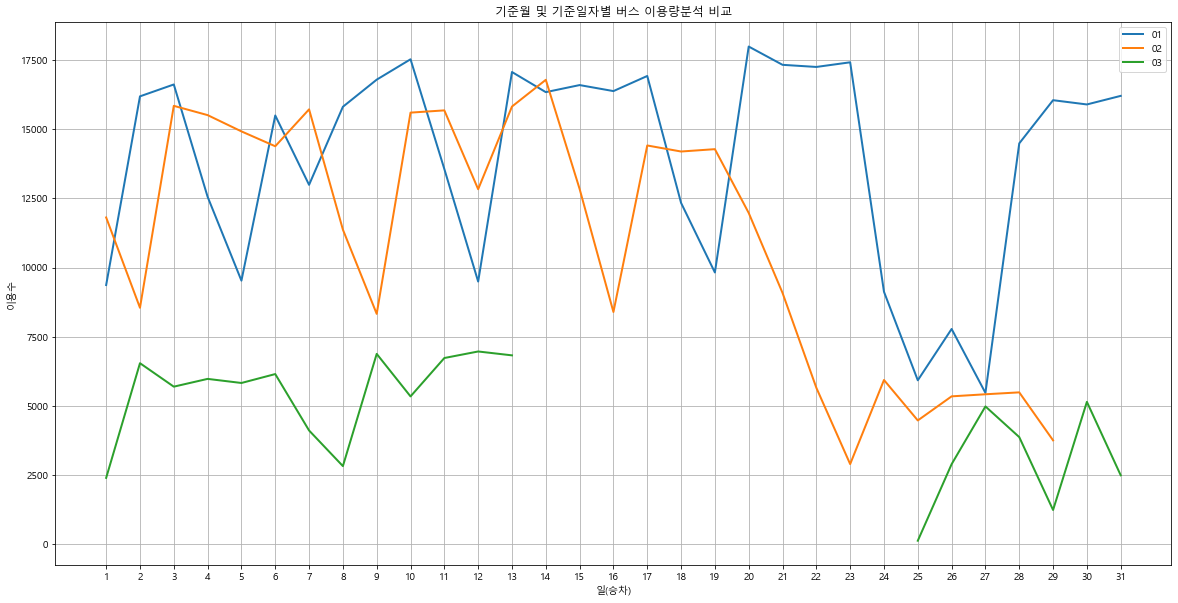

In [90]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=10)

# 데이터 넣기
df_total_p2.plot()

plt.title("기준월 및 기준일자별 버스 이용량분석 비교")
plt.ylabel("이용수")

# x축 범위?
a = range(-1,32,1)
plt.xticks([i for i in range(0,31,1)],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

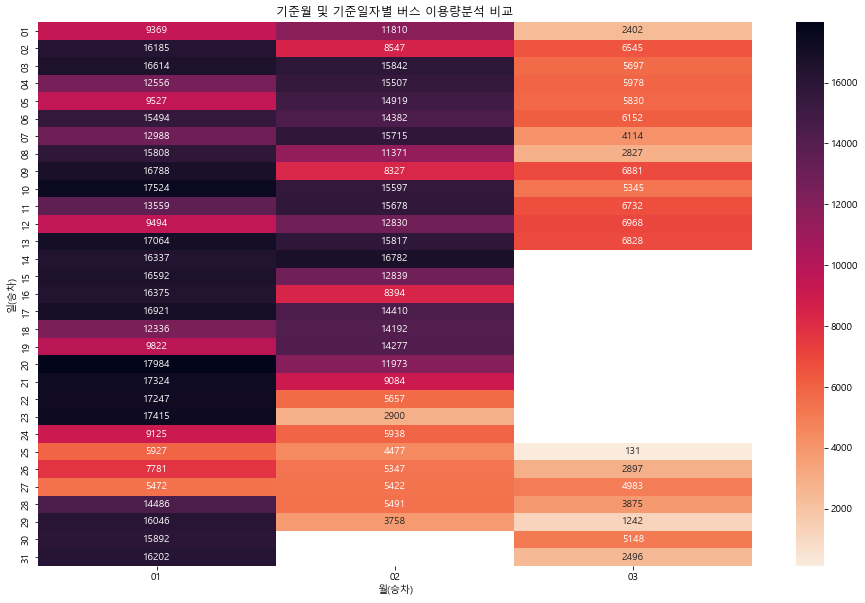

In [91]:
plt.figure(figsize=(16,10))
sns.heatmap(df_total_p2, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("기준월 및 기준일자별 버스 이용량분석 비교")
plt.show()

'''\
1월 > 2월 > 3월 순으로 이용수가 많다\
1,2,3월 모두 주말에는 버스 이용자가 크게 감소한다\
1월은 설날 연휴가 끼어 24~27일간 이용자가 크게 줄었다가 연휴가 끝나고 다시 회복되었다\
2월은 19일 이후로 이용수가 줄었고 회복되지 않았다\
2월말과 3월초의 이용수가 비슷한 것으로 보아 다른 요인이 있는것으로 판단된다\
3월14일부터 24일동안 이용건수가 비어있어 내부적 기계오류나 외부적인 요인이 있을것으로 판단된다\

'''

## 기준일 및 시간대별 버스 이용량 분석 비교

In [76]:
df_total

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,...,시(승차),분(승차),초(승차),년(하차),월(하차),일(하차),시(하차),분(하차),초(하차),소요시간
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,...,05,10,49,2020,01,02,05,18,44,0 days 00:07:55
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,...,05,13,38,2020,01,02,05,45,49,0 days 00:32:11
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,...,05,15,49,2020,01,02,05,19,30,0 days 00:03:41
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,...,05,16,17,2020,01,02,05,50,46,0 days 00:34:29
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,...,05,18,41,2020,01,02,05,23,10,0 days 00:04:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,20200327232513,20200327232800,101,양덕-고속터미널-동해,일반,Y,N,포은중앙도서관,129.367873,36.043187,...,23,25,13,2020,03,27,23,28,00,0 days 00:02:47
4979,20200327232740,20200327233319,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,...,23,27,40,2020,03,27,23,33,19,0 days 00:05:39
4980,20200327232829,20200327233446,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,시외버스터미널,129.350290,36.013280,...,23,28,29,2020,03,27,23,34,46,0 days 00:06:17
4981,20200327233328,20200327233442,107,문덕-시외(고속)터미널-흥해,일반,N,N,우현경로당,129.362232,36.049878,...,23,33,28,2020,03,27,23,34,42,0 days 00:01:14


In [77]:
df_total[['승차시각','일(승차)','시(승차)']]

,승차시각,일(승차),시(승차)
0,20200102051049,02,05
1,20200102051338,02,05
2,20200102051549,02,05
3,20200102051617,02,05
4,20200102051841,02,05
...,...,...,...
4978,20200327232513,27,23
4979,20200327232740,27,23
4980,20200327232829,27,23
4981,20200327233328,27,23


In [78]:
df_total_p3 = df_total.pivot_table(values='승차시각',
                            index='일(승차)',
                            columns='시(승차)',
                            aggfunc='count')
df_total_p3

시(승차),00,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
일(승차),,,,,,,,,,,,,,,,,,,,
01,NaN,215.0,614.0,878.0,1419.0,1393.0,1521.0,1671.0,1813.0,1800.0,1826.0,1887.0,1668.0,1703.0,1476.0,1114.0,950.0,876.0,620.0,137.0
02,NaN,200.0,684.0,1424.0,2103.0,2139.0,2119.0,2301.0,2295.0,2420.0,2416.0,2538.0,2297.0,2242.0,1889.0,1203.0,1085.0,1009.0,762.0,151.0
03,NaN,281.0,892.0,1988.0,2631.0,2627.0,2675.0,2788.0,2700.0,2935.0,2907.0,3087.0,2922.0,2725.0,2406.0,1388.0,1130.0,1091.0,802.0,178.0
04,NaN,259.0,909.0,1800.0,2247.0,2224.0,2370.0,2466.0,2649.0,2605.0,2520.0,2645.0,2638.0,2514.0,1998.0,1226.0,1087.0,1015.0,712.0,157.0
05,NaN,240.0,762.0,1441.0,1922.0,1962.0,2047.0,2140.0,2241.0,2338.0,2360.0,2456.0,2311.0,2215.0,1893.0,1163.0,1027.0,997.0,654.0,107.0
06,NaN,272.0,960.0,2058.0,2677.0,2620.0,2425.0,2677.0,2611.0,2748.0,2893.0,2863.0,2642.0,2498.0,2071.0,1213.0,1034.0,901.0,719.0,146.0
07,NaN,234.0,825.0,1685.0,2295.0,2317.0,2285.0,2373.0,2311.0,2373.0,2509.0,2508.0,2446.0,2409.0,2049.0,1246.0,1054.0,1031.0,725.0,142.0
08,NaN,213.0,644.0,1336.0,1854.0,1879.0,1984.0,2179.0,2256.0,2299.0,2362.0,2392.0,2267.0,2239.0,1943.0,1186.0,1073.0,1026.0,722.0,152.0
09,NaN,235.0,719.0,1539.0,2043.0,2164.0,2163.0,2252.0,2369.0,2443.0,2520.0,2607.0,2436.0,2298.0,2001.0,1219.0,1116.0,1053.0,662.0,157.0


In [79]:
df_total_p2 = df_total.pivot_table(values='승차시각',
                            index='일(승차)',
                            columns='월(승차)',
                            aggfunc='count')
df_total_p2

월(승차),01,02,03
일(승차),,,
01,9369.0,11810.0,2402.0
02,16185.0,8547.0,6545.0
03,16614.0,15842.0,5697.0
04,12556.0,15507.0,5978.0
05,9527.0,14919.0,5830.0
06,15494.0,14382.0,6152.0
07,12988.0,15715.0,4114.0
08,15808.0,11371.0,2827.0
09,16788.0,8327.0,6881.0


In [80]:
df_total_p3 = df_total_p3.fillna(0)
df_total_p3

시(승차),00,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
일(승차),,,,,,,,,,,,,,,,,,,,
01,0.0,215.0,614.0,878.0,1419.0,1393.0,1521.0,1671.0,1813.0,1800.0,1826.0,1887.0,1668.0,1703.0,1476.0,1114.0,950.0,876.0,620.0,137.0
02,0.0,200.0,684.0,1424.0,2103.0,2139.0,2119.0,2301.0,2295.0,2420.0,2416.0,2538.0,2297.0,2242.0,1889.0,1203.0,1085.0,1009.0,762.0,151.0
03,0.0,281.0,892.0,1988.0,2631.0,2627.0,2675.0,2788.0,2700.0,2935.0,2907.0,3087.0,2922.0,2725.0,2406.0,1388.0,1130.0,1091.0,802.0,178.0
04,0.0,259.0,909.0,1800.0,2247.0,2224.0,2370.0,2466.0,2649.0,2605.0,2520.0,2645.0,2638.0,2514.0,1998.0,1226.0,1087.0,1015.0,712.0,157.0
05,0.0,240.0,762.0,1441.0,1922.0,1962.0,2047.0,2140.0,2241.0,2338.0,2360.0,2456.0,2311.0,2215.0,1893.0,1163.0,1027.0,997.0,654.0,107.0
06,0.0,272.0,960.0,2058.0,2677.0,2620.0,2425.0,2677.0,2611.0,2748.0,2893.0,2863.0,2642.0,2498.0,2071.0,1213.0,1034.0,901.0,719.0,146.0
07,0.0,234.0,825.0,1685.0,2295.0,2317.0,2285.0,2373.0,2311.0,2373.0,2509.0,2508.0,2446.0,2409.0,2049.0,1246.0,1054.0,1031.0,725.0,142.0
08,0.0,213.0,644.0,1336.0,1854.0,1879.0,1984.0,2179.0,2256.0,2299.0,2362.0,2392.0,2267.0,2239.0,1943.0,1186.0,1073.0,1026.0,722.0,152.0
09,0.0,235.0,719.0,1539.0,2043.0,2164.0,2163.0,2252.0,2369.0,2443.0,2520.0,2607.0,2436.0,2298.0,2001.0,1219.0,1116.0,1053.0,662.0,157.0


## 시각화

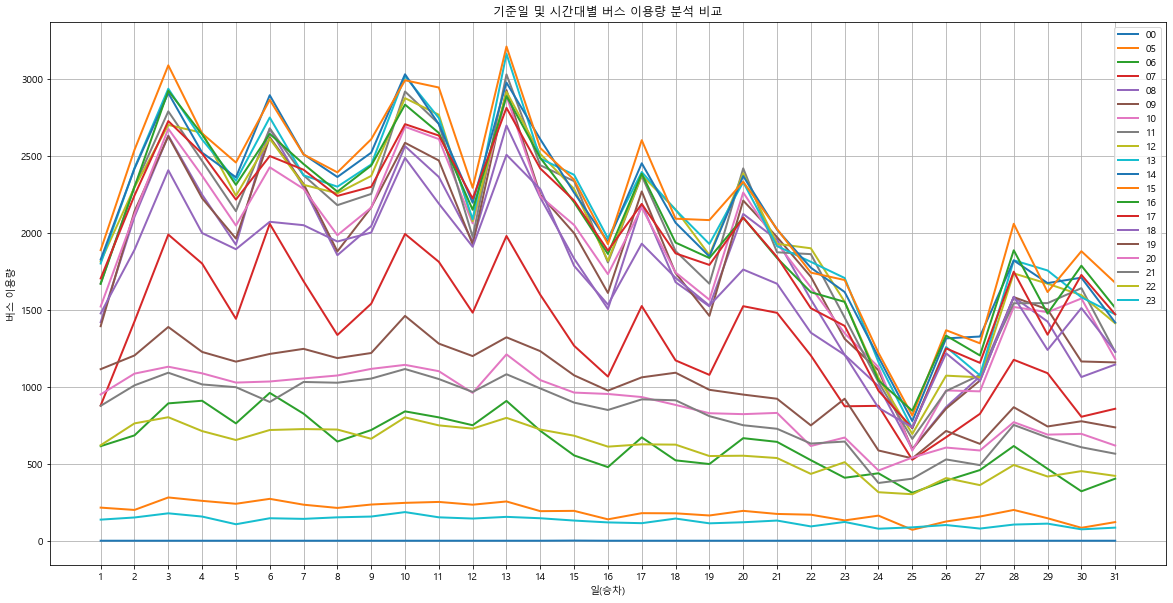

In [92]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=10)

# 데이터 넣기
df_total_p3.plot()

plt.title("기준일 및 시간대별 버스 이용량 분석 비교")
plt.ylabel("버스 이용량")

# x축 범위?
plt.xticks([i for i in range(0,31,1)],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

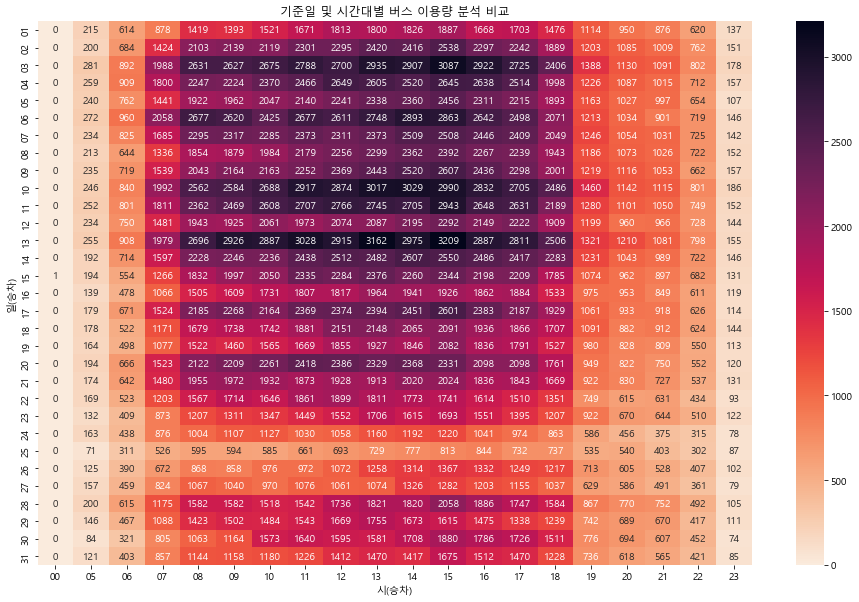

In [93]:
plt.figure(figsize=(16,10))
sns.heatmap(df_total_p3, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("기준일 및 시간대별 버스 이용량 분석 비교")
plt.show()

'''\
일 및 시간대별 이용량을 보아 점심시간대에 이용량이 대부분 많다\
출퇴근시간에는 점심때보다 이용량이 많지 않아 출퇴근에 사용되지는 않는 것 같다\
1~3월의 자료로 연휴나 주말이 겹치는 일은 이용량이 크게 감소되어 있다\
13일의 이용량이 가장 많다


'''

## 기준시간 및 시간(분)별 버스 이용량 분석 비교

In [83]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842608 entries, 0 to 4982
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   승차시각         842608 non-null  object         
 1   하차시각         842608 non-null  object         
 2   노선명          842608 non-null  object         
 3   노선설명         842608 non-null  object         
 4   승객연령         842608 non-null  object         
 5   환승여부         842608 non-null  object         
 6   추가운임여부       842608 non-null  object         
 7   승차정류장        842608 non-null  object         
 8   승차정류장 GPS X  842608 non-null  float64        
 9   승차정류장 GPS Y  842608 non-null  float64        
 10  하차정류장        842608 non-null  object         
 11  하차정류장 GPS X  842608 non-null  float64        
 12  하차정류장 GPS Y  842608 non-null  float64        
 13  년(승차)        842608 non-null  object         
 14  월(승차)        842608 non-null  object         
 15  일(승차)        842608

In [84]:
df_total[['승차시각','시(승차)','분(승차)']]

,승차시각,시(승차),분(승차)
0,20200102051049,05,10
1,20200102051338,05,13
2,20200102051549,05,15
3,20200102051617,05,16
4,20200102051841,05,18
...,...,...,...
4978,20200327232513,23,25
4979,20200327232740,23,27
4980,20200327232829,23,28
4981,20200327233328,23,33


In [85]:
df_total_p4 = df_total.pivot_table(values='승차시각',
                            index='시(승차)',
                            columns='분(승차)',
                            aggfunc='count')
df_total_p4

분(승차),00,01,02,03,04,05,06,07,08,09,...,50,51,52,53,54,55,56,57,58,59
시(승차),,,,,,,,,,,,,,,,,,,,,
00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,167.0,245.0,195.0,200.0,193.0,250.0,189.0,235.0,259.0,243.0
06,248.0,237.0,186.0,211.0,252.0,244.0,214.0,255.0,232.0,354.0,...,399.0,452.0,414.0,349.0,399.0,374.0,400.0,387.0,470.0,442.0
07,434.0,391.0,390.0,422.0,371.0,451.0,431.0,481.0,593.0,480.0,...,906.0,939.0,856.0,807.0,747.0,774.0,860.0,1106.0,891.0,1159.0
08,1039.0,872.0,1008.0,1025.0,812.0,1122.0,864.0,819.0,800.0,913.0,...,905.0,811.0,830.0,974.0,993.0,907.0,1008.0,1060.0,932.0,1023.0
09,1130.0,1114.0,1119.0,973.0,1024.0,1103.0,831.0,950.0,926.0,850.0,...,1094.0,901.0,960.0,820.0,754.0,875.0,792.0,823.0,1000.0,837.0
10,878.0,808.0,918.0,890.0,827.0,1009.0,928.0,969.0,1042.0,859.0,...,1184.0,989.0,890.0,1137.0,881.0,947.0,1058.0,1042.0,1141.0,1135.0
11,898.0,1134.0,1060.0,872.0,1143.0,1078.0,1034.0,1097.0,1003.0,1036.0,...,1053.0,871.0,1019.0,1024.0,907.0,1281.0,1212.0,1115.0,1163.0,1020.0
12,984.0,1029.0,1070.0,1157.0,1098.0,1131.0,1167.0,1117.0,1198.0,1048.0,...,996.0,1007.0,963.0,966.0,904.0,974.0,1133.0,959.0,902.0,1204.0


In [86]:
df_total_p4 = df_total_p4.fillna(0)
df_total_p4

분(승차),00,01,02,03,04,05,06,07,08,09,...,50,51,52,53,54,55,56,57,58,59
시(승차),,,,,,,,,,,,,,,,,,,,,
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,167.0,245.0,195.0,200.0,193.0,250.0,189.0,235.0,259.0,243.0
06,248.0,237.0,186.0,211.0,252.0,244.0,214.0,255.0,232.0,354.0,...,399.0,452.0,414.0,349.0,399.0,374.0,400.0,387.0,470.0,442.0
07,434.0,391.0,390.0,422.0,371.0,451.0,431.0,481.0,593.0,480.0,...,906.0,939.0,856.0,807.0,747.0,774.0,860.0,1106.0,891.0,1159.0
08,1039.0,872.0,1008.0,1025.0,812.0,1122.0,864.0,819.0,800.0,913.0,...,905.0,811.0,830.0,974.0,993.0,907.0,1008.0,1060.0,932.0,1023.0
09,1130.0,1114.0,1119.0,973.0,1024.0,1103.0,831.0,950.0,926.0,850.0,...,1094.0,901.0,960.0,820.0,754.0,875.0,792.0,823.0,1000.0,837.0
10,878.0,808.0,918.0,890.0,827.0,1009.0,928.0,969.0,1042.0,859.0,...,1184.0,989.0,890.0,1137.0,881.0,947.0,1058.0,1042.0,1141.0,1135.0
11,898.0,1134.0,1060.0,872.0,1143.0,1078.0,1034.0,1097.0,1003.0,1036.0,...,1053.0,871.0,1019.0,1024.0,907.0,1281.0,1212.0,1115.0,1163.0,1020.0
12,984.0,1029.0,1070.0,1157.0,1098.0,1131.0,1167.0,1117.0,1198.0,1048.0,...,996.0,1007.0,963.0,966.0,904.0,974.0,1133.0,959.0,902.0,1204.0


## 시각화

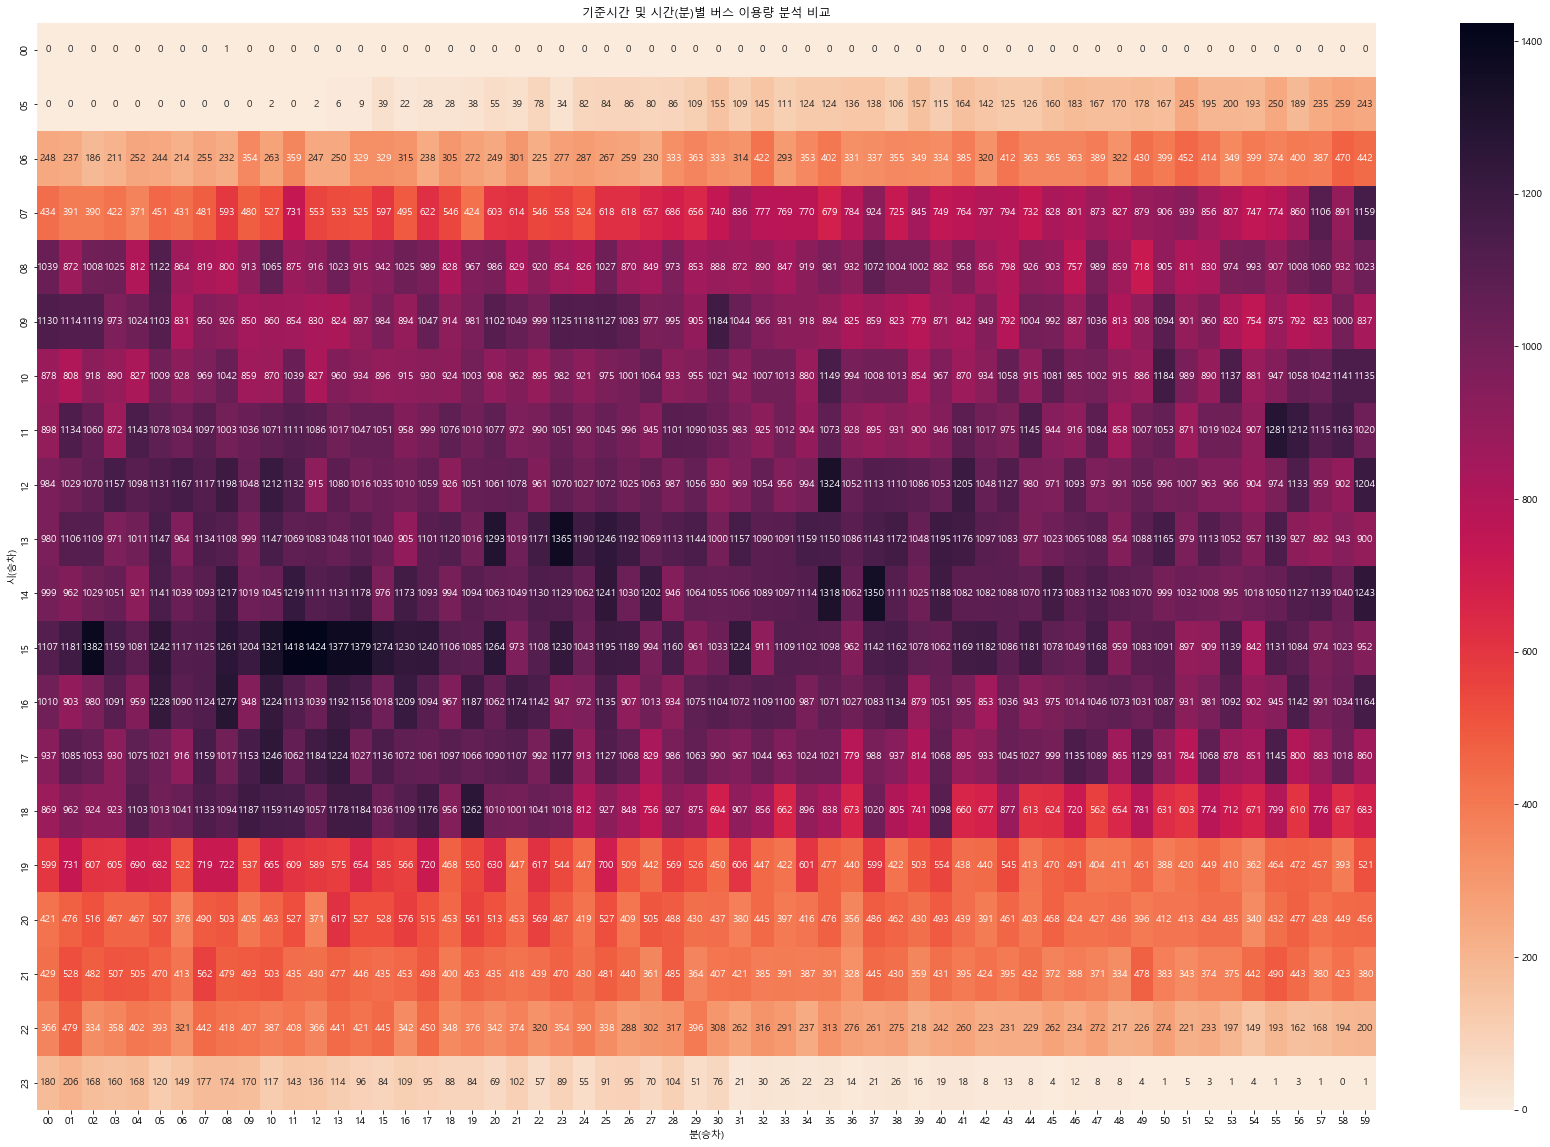

In [94]:
plt.figure(figsize=(30,20))
sns.heatmap(df_total_p4, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("기준시간 및 시간(분)별 버스 이용량 분석 비교")
plt.show()

'''\
00시, 05시, 23시는 다른 시간대에 비해 이용자가 매우 적다\
01시부터 04시까지는 이용자가 없어서 나타나지 않았다\
보통 점심시간 전후로 이용자가 많고 10~15분 사이, 35~40분 사이에 히트맵 색이 진하여 이용자가 몰리는것 같다\
'''